In [27]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from mapping import map_str_values
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [30]:
X = pd.read_csv("data/train_values.csv", index_col="building_id")
X = map_str_values(X)

In [28]:
Y = pd.read_csv("data/train_labels.csv", index_col="building_id")
temp = {
    1: 0,
    2: 1,
    3: 2
}

Y["damage_grade"] = Y["damage_grade"].map(temp)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=192)

In [32]:
Y_train

,damage_grade
building_id,
823592,2
296261,1
331813,2
25257,3
576917,3
...,...
285042,2
840011,2
26471,1


array([[2],
       [1],
       [2],
       ...,
       [2],
       [1],
       [2]], dtype=int64)

In [33]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, Y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
Y_pred = gaussNB.predict(X_test)
Y_pred

array([1, 3, 2, ..., 3, 1, 1], dtype=int64)

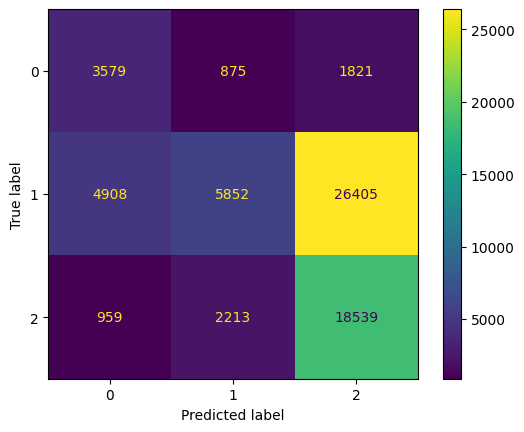

In [49]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

In [59]:
acc = metrics.accuracy_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred, average="weighted")
recall - acc

0.0

In [57]:
18539 / (18539 + 2213 + 959)

0.8538989452351342

0.57
0.157
0.853

In [58]:
(0.57 + 0.157 + 0.853)/3


0.5266666666666667